In [27]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets

### Extraction of ground data
Ground data are collected to evaluate the performance of the model, to check if it is able to estimate with accuracy the variable of the environment and if it is able to emulate the real world behaviour.

In [28]:
ground_folder = "../data/ground"
ground_path = Path(ground_folder)

ground_files = ['None']
ground_files.extend(os.listdir(ground_path))

In [29]:
y = widgets.Dropdown(
    options=ground_files,
    value='None',
    description='Select ground data:',
    disabled=False,
)

def on_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected ground csv file \"%s\"" % selection['new'])
    y.disabled = True

y.observe(on_selection)

display(y)

Dropdown(description='Select ground data:', options=('None', 'ground_data.csv'), value='None')

Selected ground csv file "ground_data.csv"


In [30]:
df_ground = pd.read_csv(ground_path / y.value, encoding= 'unicode_escape')

In [31]:
df_ground['Timestamp'] = pd.to_datetime(df_ground['Time'], format="%Y/%m/%d %H:%M:%S").values.astype(float) // 10 ** 9
df_ground['Timestamp'] = df_ground['Timestamp'] - df_ground['Timestamp'][0]

In [32]:
df_ground

,Time,Voltage [V],Current [A],Power [W],Temperature [°C],Timestamp
0,2020/07/21 10:06:59,4.068,-20.011,-81.397232,23.289,0.0
1,2020/07/21 10:07:00,4.057,-19.998,-81.134929,23.193,1.0
2,2020/07/21 10:07:01,4.055,-19.998,-81.085404,23.221,2.0
3,2020/07/21 10:07:02,4.053,-19.999,-81.050204,23.233,3.0
4,2020/07/21 10:07:03,4.051,-19.999,-81.014614,23.312,4.0
...,...,...,...,...,...,...
30599,2020/07/21 18:36:39,4.150,0.239,0.991035,23.496,30580.0
30600,2020/07/21 18:36:40,4.150,0.247,1.024197,23.427,30581.0
30601,2020/07/21 18:36:41,4.150,0.242,1.004299,23.467,30582.0
30602,2020/07/21 18:36:42,4.150,0.231,0.957864,23.442,30583.0


### Extraction of processed data after the experiment
Data are stored under a folder which adopts a naming convention based on the timestamp at which it was created.

In [48]:
output_folder = "../data/output"
experiment_folder = "enrica_current_load"
experiment_path = Path(output_folder) / Path(experiment_folder)

list_dir = ['None']
list_dir.extend(os.listdir(experiment_path))

In [49]:
w = widgets.Dropdown(
    options=list_dir,
    value='None',
    description='Select the experiment:',
    disabled=False,
)

def on_selection(selection):
    if selection['type'] == 'change' and selection['name'] == 'value':
        print("Selected folder \"%s\"" % selection['new'])
    w.disabled = True

w.observe(on_selection)

display(w)

Dropdown(description='Select the experiment:', options=('None', '2023-04-19_17-09', '2023-04-19_17-19', '2023-…

Selected folder "2023-04-20_12-09"


In [50]:
experiment_name = w.value
csv_file = 'dataset.csv'

full_path = experiment_path / experiment_name / csv_file

In [51]:
df = pd.read_csv(full_path)

In [52]:
df['Power [W]'] = df['Voltage [V]'] * df['Current [A]']

In [53]:
df

,Time,soc,soh,Voltage [V],Current [A],Vocv,R0,R1,C,Temperature [C],Power [W]
0,-1.0,1.000000,1.0,0.000000,0.000,0.000000,0.00000,0.000000,0.00000,25.000000,0.000000
1,0.0,0.999722,NaN,4.051673,20.011,4.128000,0.00375,0.002905,15316.22569,24.992946,81.078037
2,1.0,0.999444,NaN,4.050209,19.998,4.127736,0.00375,0.002905,15316.22569,24.985903,80.996085
3,2.0,0.999167,NaN,4.048724,19.998,4.127472,0.00375,0.002905,15316.22569,24.978872,80.966382
4,3.0,0.998889,NaN,4.047262,19.999,4.127208,0.00375,0.002905,15316.22569,24.971855,80.941187
...,...,...,...,...,...,...,...,...,...,...,...
30578,30577.0,1.000000,NaN,4.129638,-0.245,4.128000,0.00375,0.002905,15316.22569,20.007202,-1.011761
30579,30578.0,1.000000,NaN,4.129630,-0.243,4.128000,0.00375,0.002905,15316.22569,20.007191,-1.003500
30580,30579.0,1.000000,NaN,4.129615,-0.239,4.128000,0.00375,0.002905,15316.22569,20.007180,-0.986978
30581,30580.0,1.000000,NaN,4.129645,-0.247,4.128000,0.00375,0.002905,15316.22569,20.007168,-1.020022


### Comparison of processed values and ground data
Plots of load variables, output variables compared with ground data and side variables.

In [54]:
def plot_output_data(dfs, variables, labels, x_axes, title, colors=None):
    
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
        
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(b=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i])
    
    plt.title(title)
    plt.legend()
    plt.show()

In [55]:
def plot_vars(df, variables, x_var, title, colors=None):
    
    if not colors:
        colors = ['cyan', 'violet', 'purple', 'magenta']
    
    fig, axes = plt.subplots(len(variables), 1, figsize=(15,3.5 * len(variables)), sharex=True)
    
    # Plot iteratively all the variables
    for i, var in enumerate(variables):
        
        # We need this assignement in the case of a single variable
        if len(variables) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        # Command for the grid
        ax.grid(b=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
        
        ax.plot(df[x_var], df[var], label=var, color=colors[i])
        ax.set_title(title + var)
        ax.legend(markerscale=2.5)
        
    plt.show()

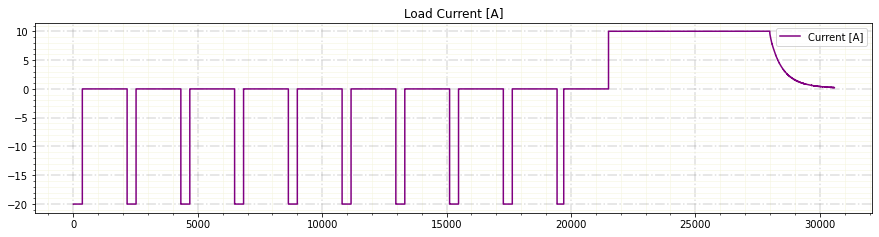

In [56]:
variables = ['Current [A]']
x_var = 'Timestamp'
title = 'Load '
colors = ['purple']

plot_vars(df=df_ground, variables=variables, x_var=x_var, title=title, colors=colors)

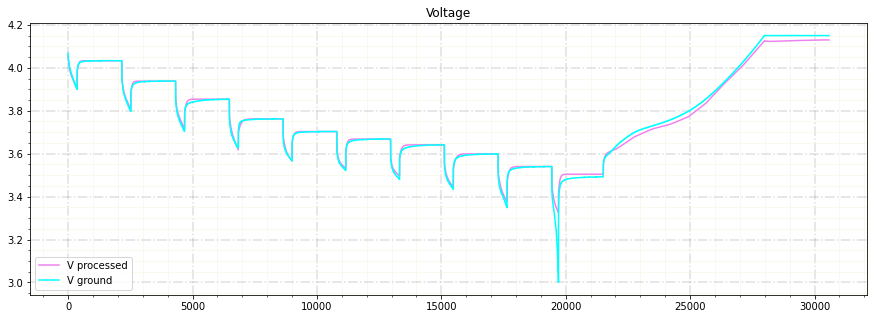

In [57]:
dfs = [df.iloc[1:], df_ground]
var = ['Voltage [V]', 'Voltage [V]']
labels = ['V processed', 'V ground']
x_axes = ['Time', 'Timestamp']
title = 'Voltage'

plot_output_data(dfs=dfs, variables=var, x_axes=x_axes, labels=labels, title=title)

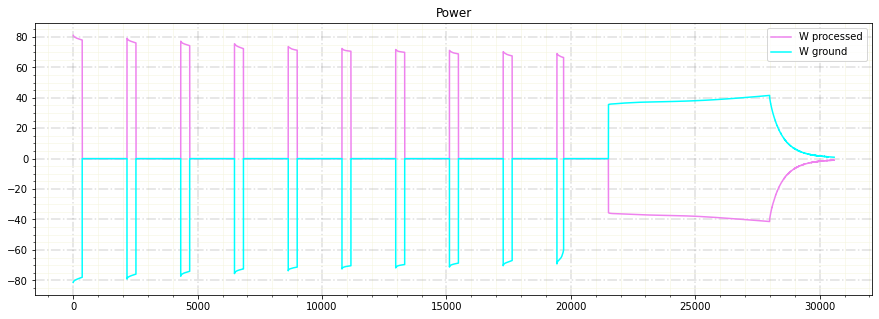

In [58]:
dfs = [df.iloc[1:], df_ground]
var = ['Power [W]', 'Power [W]']
labels = ['W processed', 'W ground']
x_axes = ['Time', 'Timestamp']
title = 'Power'

plot_output_data(dfs=dfs, variables=var, x_axes=x_axes, labels=labels, title=title)

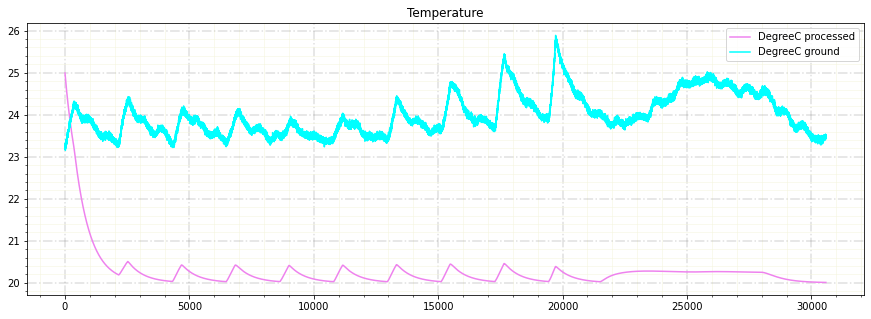

In [59]:
dfs = [df.iloc[1:], df_ground]
var = ['Temperature [C]', 'Temperature [°C]']
labels = ['DegreeC processed', 'DegreeC ground']
x_axes = ['Time', 'Timestamp']
title = 'Temperature'

plot_output_data(dfs=dfs, variables=var, x_axes=x_axes, labels=labels, title=title)

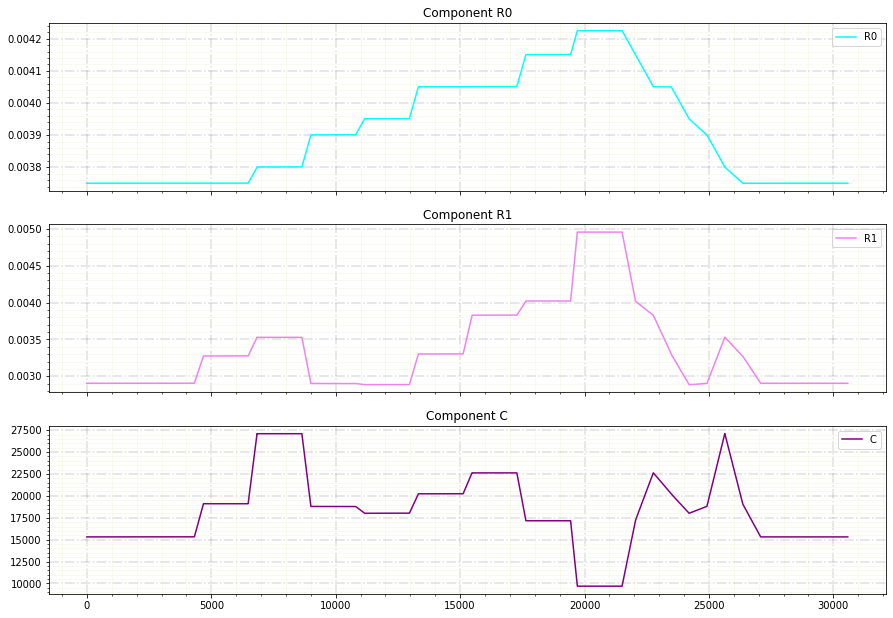

In [25]:
variables = ['R0', 'R1', 'C']
x_var = 'Time'
title = 'Component '

plot_vars(df=df.iloc[1:], variables=variables, x_var=x_var, title=title)

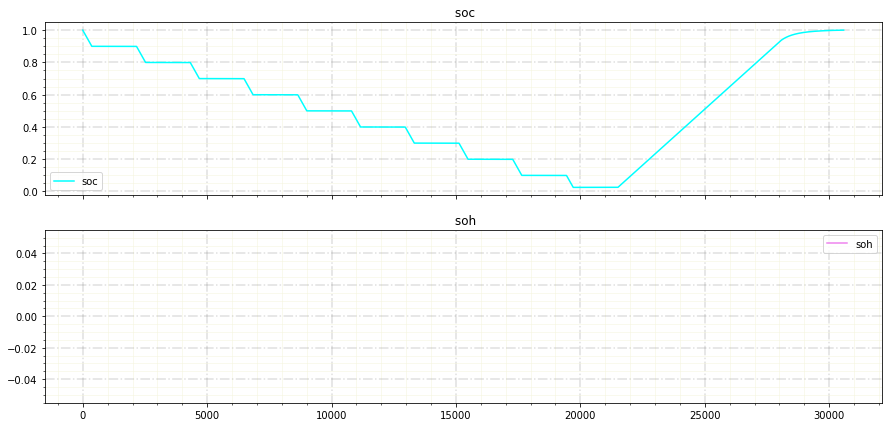

In [26]:
variables = ['soc', 'soh']
x_var = 'Time'
title = ' '

plot_vars(df=df.iloc[1:], variables=variables, x_var=x_var, title=title)